<a href="https://colab.research.google.com/github/asmitamohanty/DROID/blob/main/DROID_100_behavior_cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DROID: A Large-Scale In-The-Wild Robot Manipulation Dataset

![](https://droid-dataset.github.io/droid/assets/index/droid_teaser.jpg)

This Colab demonstrates how to load and visualize samples from the DROID dataset. Please also check out our [dataset visualizer](https://droid-dataset.github.io/dataset.html) to explore the dataset.

You can download the full dataset (1.7TB) using:
```
gsutil -m cp -r gs://gresearch/robotics/droid <your_local_path>
```

If you'd like to download an example version of the dataset with 100 episodes first (2GB), run:
```
gsutil -m cp -r gs://gresearch/robotics/droid_100 <your_local_path>
```

If you want to use DROID for policy training, please check out our [policy training repo](https://github.com/droid-dataset/droid_policy_learning).

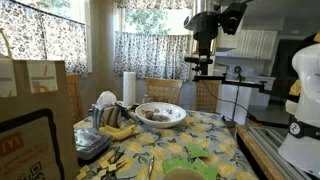

In [30]:
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
from IPython import display

def as_gif(images, path="temp.gif"):
  # Render the images as the gif (15Hz control frequency):
  images[0].save(path, save_all=True, append_images=images[1:], duration=int(1000/15), loop=0)
  gif_bytes = open(path,"rb").read()
  return gif_bytes


ds = tfds.load("droid_100", data_dir="gs://gresearch/robotics", split="train")

images = []
for episode in ds.shuffle(10, seed=0).take(1):
  #print(len(episode["steps"]))
  for i, step in enumerate(episode["steps"]):
    #print("Index:", i)
    images.append(
      Image.fromarray(
        np.concatenate((
              step["observation"]["exterior_image_1_left"].numpy(),
              #step["observation"]["exterior_image_2_left"].numpy(),
              #step["observation"]["wrist_image_left"].numpy(),
        ), axis=1)
      )
    )
    #print(step["observation"]["exterior_image_1_left"].shape)
    #plt.imshow(step["observation"]["exterior_image_1_left"].numpy())
    #plt.show()
    #if i==3:
      #break

display.Image(as_gif(images))

In [1]:
# Available Features (note that 'reward' is a dummy feature at the moment)
import tensorflow_datasets as tfds

builder = tfds.builder_from_directory(builder_dir="gs://gresearch/robotics/droid/1.0.0")
builder.info.features

FeaturesDict({
    'episode_metadata': FeaturesDict({
        'file_path': string,
        'recording_folderpath': string,
    }),
    'steps': Dataset({
        'action': Tensor(shape=(7,), dtype=float64, description=Robot action, consists of [6x joint velocities, 1x gripper position].),
        'action_dict': FeaturesDict({
            'cartesian_position': Tensor(shape=(6,), dtype=float64, description=Commanded Cartesian position),
            'cartesian_velocity': Tensor(shape=(6,), dtype=float64, description=Commanded Cartesian velocity),
            'gripper_position': Tensor(shape=(1,), dtype=float64, description=Commanded gripper position),
            'gripper_velocity': Tensor(shape=(1,), dtype=float64, description=Commanded gripper velocity),
            'joint_position': Tensor(shape=(7,), dtype=float64, description=Commanded joint position),
            'joint_velocity': Tensor(shape=(7,), dtype=float64, description=Commanded joint velocity),
        }),
        'discount'

## Raw DROID Data

The RLDS version of the DROID dataset is optimized for loading speed during policy training. Thus, it contains lower-resolution images (180x320 px) and no stereo or depth data. If you need access to the full-HD, stereo videos we recorded, you can download the raw DROID data with the following command:
```
gsutil -m cp -r gs://gresearch/robotics/droid_raw <your_local_path>
```
Here we store data in MP4 format for more efficient storage. For more information about the raw data format, see our [developer documentation](https://droid-dataset.github.io/droid/the-droid-dataset.html).

In [2]:
print(builder.info.features['steps']['observation']['exterior_image_1_left'])
print(builder.info.features['steps']['action'])

Image(shape=(180, 320, 3), dtype=uint8, description=Exterior camera 1 left viewpoint)
Tensor(shape=(7,), dtype=float64, description=Robot action, consists of [6x joint velocities, 1x gripper position].)


In [3]:
dataset = builder.as_dataset()

In [5]:
import matplotlib.pyplot as plt

In [ ]:
for episode in dataset['train'].take(1):
  for i, step in enumerate(episode['steps']):
    image = step['observation']['exterior_image_1_left']#.numpy()
    action = step['action']
    print(image.shape)
    print(action.shape)
    #plt.figure()
    #plt.imshow(image.numpy())
    break

(180, 320, 3)
(7,)


166
tf.Tensor(
[ 0.38357484  0.07346953  0.55135942 -2.89342165 -0.19871207  0.12699035
  0.        ], shape=(7,), dtype=float64)


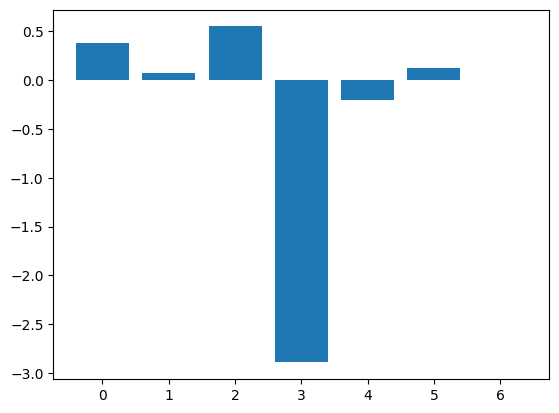

In [24]:
for episode in ds.take(1):
  print(len(episode["steps"]))
  for i, step in enumerate(episode["steps"]):
    action = step['action']
    print(action)
    #plt.bar(range(len(action.numpy())), action.numpy())
    #plt.show()
    break

In [34]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [12]:
dataset_list = list(tfds.as_numpy(ds))
print(dataset_list)

[{'episode_metadata': {'file_path': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/RAIL/success/2023-04-17/Mon_Apr_17_14:48:05_2023/trajectory.h5', 'recording_folderpath': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/RAIL/success/2023-04-17/Mon_Apr_17_14:48:05_2023/recordings/MP4'}, 'steps': <tensorflow_datasets.core.dataset_utils._IterableDataset object at 0x7b64aefcf710>}, {'episode_metadata': {'file_path': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/RPL/success/2023-06-05/Mon_Jun__5_20:15:38_2023/trajectory.h5', 'recording_folderpath': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/RPL/success/2023-06-05/Mon_Jun__5_20:15:38_2023/recordings/MP4'}, 'steps': <tensorflow_datasets.core.dataset_utils._IterableDataset object at 0x7b6449b10bd0>}, {'episode_metadata': {'file_path': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/TRI/success/2023-10-18/Wed_Oct_18_15:39:19_2023/trajectory.h5', 'recording_folderpath': b'/nfs/kun2/datasets/r2d2/r2d2-data-full/TRI/success/2023-10-18/Wed_Oct_18_15:39:19_2023/recordings/MP4

In [19]:
print(len(dataset_list))
print(dataset_list[0].keys())
print(dataset_list[0]['steps'])

100
dict_keys(['episode_metadata', 'steps'])


In [32]:
exterior_imgs = []
for data in dataset_list[:1]:
  print(len(data['steps']))  #every step has some considerable amount of images => together they can form the gif. each episode in step has a correpsonding action
  #print(len(data['steps']['action']))
  for e, episode in enumerate(data['steps']):
    print("Index:",e)
    print(episode['action'].shape)
    print(episode['observation']['exterior_image_1_left'].shape)
    image = episode['observation']['exterior_image_1_left']
    #plt.imshow(image)
    #plt.show()
    if e==3:
      break


166
Index: 0
(7,)
(180, 320, 3)
Index: 1
(7,)
(180, 320, 3)
Index: 2
(7,)
(180, 320, 3)
Index: 3
(7,)
(180, 320, 3)


In [35]:
class custom_droid_dataset(Dataset):
  def __init__(self, tfds_dslist, num_samples = None, transform=None):
    self.data = tfds_dslist
    self.transform = transform

    self.images = []
    self.actions = []

    if num_samples is not None:
       self.data = self.data[:num_samples]

    for episode in self.data:
      for step in episode['steps']:
        image = step['observation']['exterior_image_1_left']
        action = step['action']
        self.images.append(torch.tensor(image, dtype=torch.float32))
        self.actions.append(torch.tensor(action, dtype=torch.float32))

  def __getitem__(self, index):
    image = self.images[index]
    action = self.actions[index]

    if self.transform is not None:
      image = self.transform(image)

    return image, action

  def __len__(self):
    return len(self.images)